In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

%matplotlib inline

In [18]:
image = cv2.imread('./palimpsest-2024.jpg')

In [19]:
blue_channel, green_channel, red_channel = cv2.split(image)

In [21]:
matrices = [('Red', red_channel), ('Green', green_channel), ('Blue', blue_channel)]

max_diff = 0
max_indices = (0, 0)

for i in range(len(matrices)):
    for j in range(i+1, len(matrices)):
        diff = np.sum(np.abs(matrices[i][1] - matrices[j][1]))
        if diff > max_diff:
            max_diff = diff
            max_indices = (i, j)

index1, matrix_with_max_diff1 = matrices[max_indices[0]]
index2, matrix_with_max_diff2 = matrices[max_indices[1]]

print("Channels with the highest difference:", index1, "&" ,index2)


Channels with the highest difference: Red & Blue


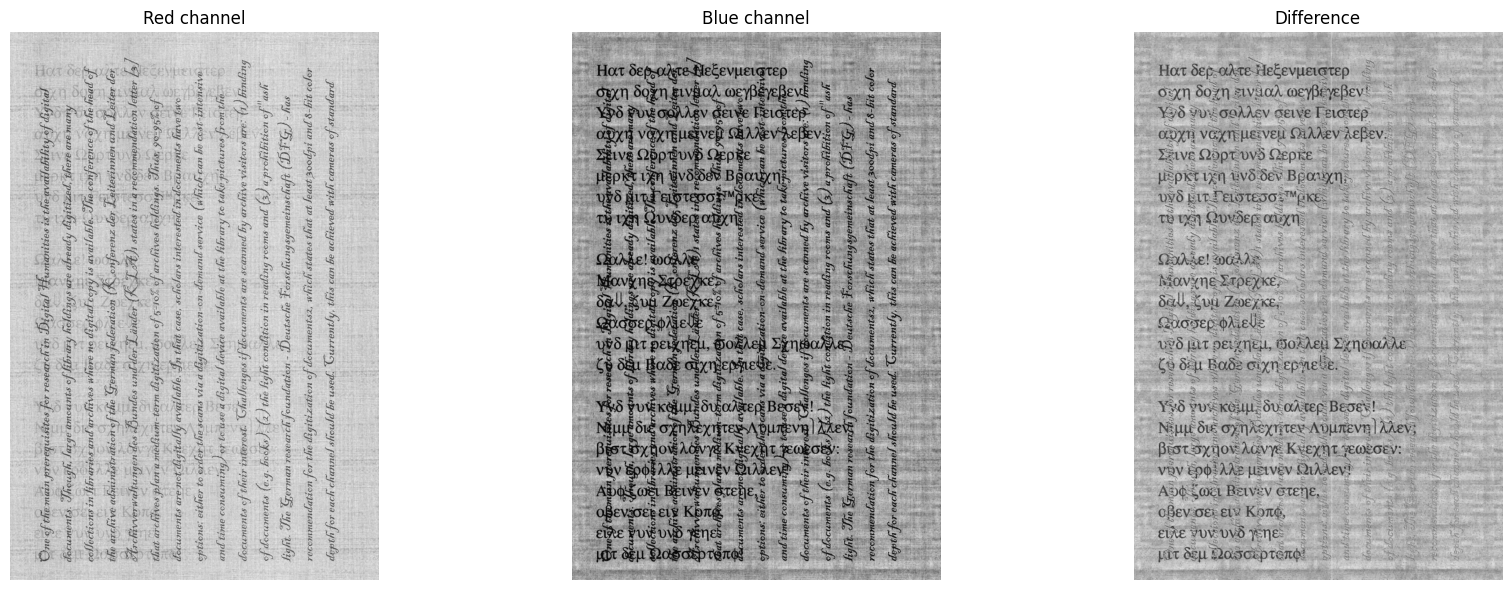

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel-red_channel, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.tight_layout()

plt.show()

In [23]:
def pca_components(image):
    # Split image into red and blue channels
    red_channel = image[:,:,2]
    blue_channel = image[:,:,0]

    # Reshape channels into vectors
    red_vector = red_channel.reshape(-1, 1)
    blue_vector = blue_channel.reshape(-1, 1)

    # Concatenate red and blue vectors
    data = np.concatenate((red_vector, blue_vector), axis=1)

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(data)

    # Get principal components
    principal_components = pca.components_

    # Project pixels onto the axis with largest variance (1st principal component)
    first_component = np.dot(data, principal_components[0])

    # Normalize values to range [0, 255]
    first_component_normalized = (first_component - np.min(first_component)) / (np.max(first_component) - np.min(first_component)) * 255

    # Reshape to image dimensions
    first_component_image = first_component_normalized.reshape(red_channel.shape)

    # Map ends of axis to "black" and "white"
    first_component_image[first_component_image < 0] = 0
    first_component_image[first_component_image > 255] = 255

    # Generate new image as weighted sum of constituent images
    first_component_combined = cv2.merge([first_component_image, first_component_image, first_component_image])

    # Project pixels onto perpendicular axis with next largest variance (2nd principal component)
    second_component = np.dot(data, principal_components[1])

    # Normalize values to range [0, 255]
    second_component_normalized = (second_component - np.min(second_component)) / (np.max(second_component) - np.min(second_component)) * 255

    # Reshape to image dimensions
    second_component_image = second_component_normalized.reshape(red_channel.shape)

    # Map ends of axis to "black" and "white"
    second_component_image[second_component_image < 0] = 0
    second_component_image[second_component_image > 255] = 255

    # Generate new image as weighted sum of constituent images
    second_component_combined = cv2.merge([second_component_image, second_component_image, second_component_image])

    return first_component_combined.astype(np.uint8), second_component_combined.astype(np.uint8)

# Load image

# Call function to get principal components
first_component, second_component = pca_components(image)

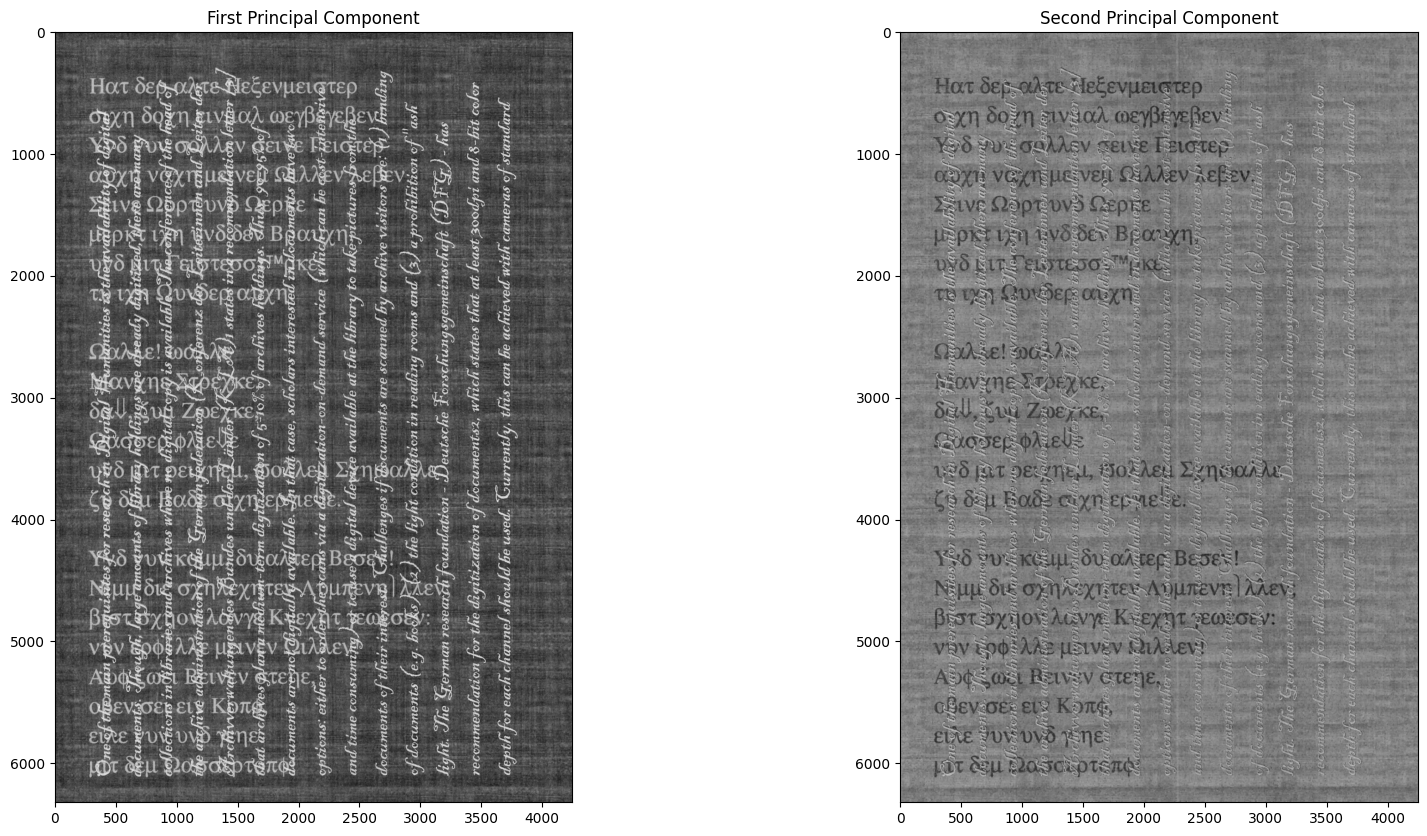

In [24]:
# Display results
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(first_component, cmap='gray')
plt.title('First Principal Component')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(second_component, cmap='gray')
plt.title('Second Principal Component')
plt.axis('off')

plt.show()

In [25]:

def pca_components(image):
    # Split image into red, green, and blue channels
    red_channel = image[:,:,2]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,0]

    # Reshape channels into vectors
    red_vector = red_channel.reshape(-1, 1)
    green_vector = green_channel.reshape(-1, 1)
    blue_vector = blue_channel.reshape(-1, 1)

    # Concatenate red, green, and blue vectors
    data = np.concatenate((red_vector, green_vector, blue_vector), axis=1)

    # Perform PCA
    pca = PCA(n_components=3)
    pca.fit(data)

    # Get principal components
    principal_components = pca.components_

    # Project pixels onto the axis with largest variance (1st principal component)
    first_component = np.dot(data, principal_components[0])

    # Normalize values to range [0, 255]
    first_component_normalized = (first_component - np.min(first_component)) / (np.max(first_component) - np.min(first_component)) * 255

    # Reshape to image dimensions
    first_component_image = first_component_normalized.reshape(red_channel.shape)

    # Map ends of axis to "black" and "white"
    first_component_image[first_component_image < 0] = 0
    first_component_image[first_component_image > 255] = 255

    # Generate new image as weighted sum of constituent images
    first_component_combined = cv2.merge([first_component_image, first_component_image, first_component_image])

    # Project pixels onto perpendicular axis with next largest variance (2nd principal component)
    second_component = np.dot(data, principal_components[1])

    # Normalize values to range [0, 255]
    second_component_normalized = (second_component - np.min(second_component)) / (np.max(second_component) - np.min(second_component)) * 255

    # Reshape to image dimensions
    second_component_image = second_component_normalized.reshape(red_channel.shape)

    # Map ends of axis to "black" and "white"
    second_component_image[second_component_image < 0] = 0
    second_component_image[second_component_image > 255] = 255

    # Generate new image as weighted sum of constituent images
    second_component_combined = cv2.merge([second_component_image, second_component_image, second_component_image])

    # Project pixels onto perpendicular axis with next largest variance (3rd principal component)
    third_component = np.dot(data, principal_components[2])

    # Normalize values to range [0, 255]
    third_component_normalized = (third_component - np.min(third_component)) / (np.max(third_component) - np.min(third_component)) * 255

    # Reshape to image dimensions
    third_component_image = third_component_normalized.reshape(red_channel.shape)

    # Map ends of axis to "black" and "white"
    third_component_image[third_component_image < 0] = 0
    third_component_image[third_component_image > 255] = 255

    # Generate new image as weighted sum of constituent images
    third_component_combined = cv2.merge([third_component_image, third_component_image, third_component_image])

    return first_component_combined.astype(np.uint8), second_component_combined.astype(np.uint8), third_component_combined.astype(np.uint8)

# Call function to get principal components
first_component, second_component, third_component = pca_components(image)


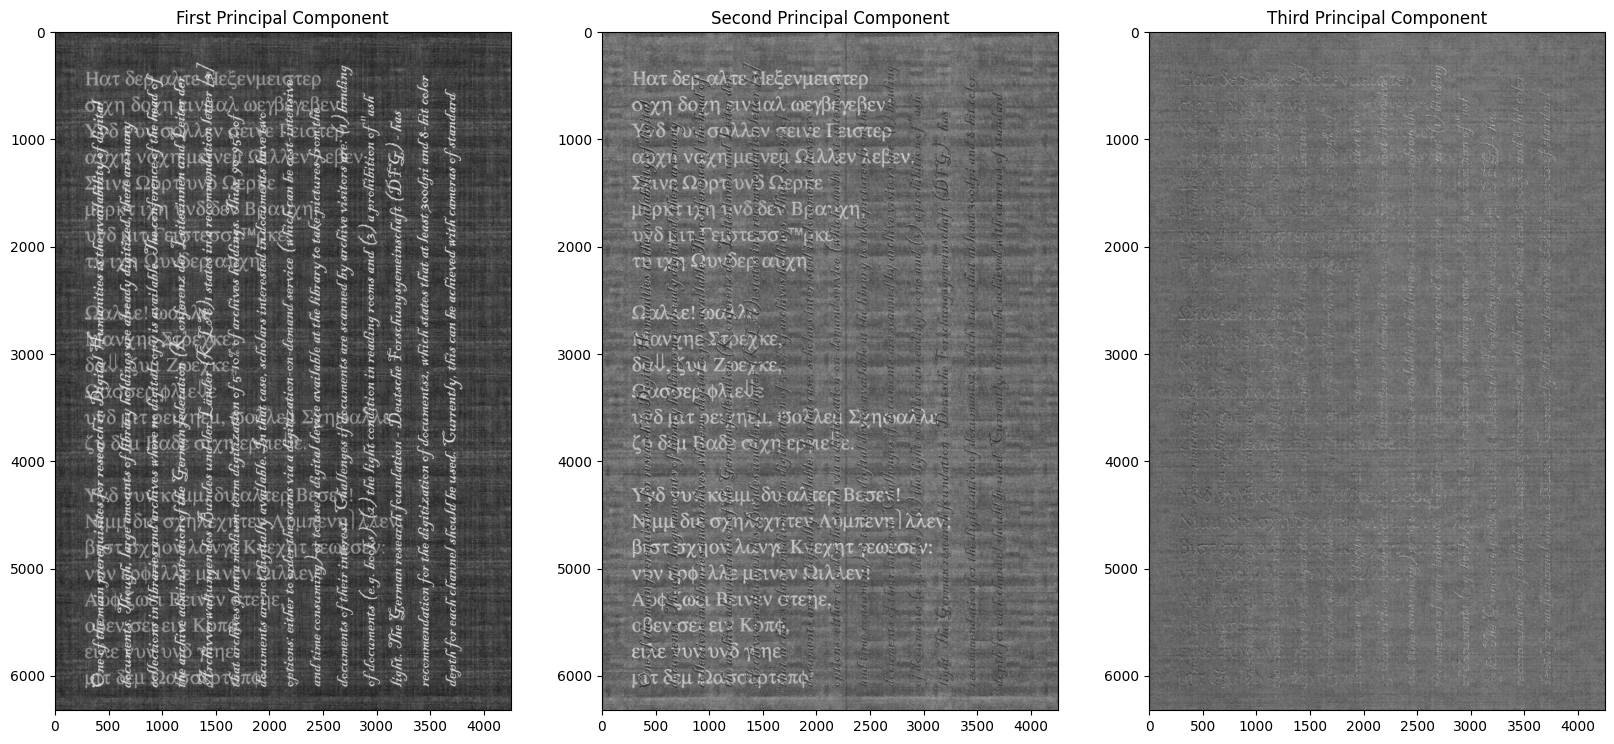

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(first_component)
plt.title('First Principal Component')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(second_component)
plt.title('Second Principal Component')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(third_component)
plt.title('Third Principal Component')
plt.axis('off')

plt.show()

In [27]:
def ica_components(image):
    # Split image into red and blue channels
    red_channel = image[:,:,2]
    blue_channel = image[:,:,0]

    # Reshape channels into vectors
    red_vector = red_channel.reshape(-1, 1)
    blue_vector = blue_channel.reshape(-1, 1)

    # Concatenate red and blue vectors
    data = np.concatenate((red_vector, blue_vector), axis=1)

    # Perform ICA
    ica = FastICA(n_components=2)
    components = ica.fit_transform(data)

    # Normalize values to range [0, 255]
    components_normalized = (components - np.min(components)) / (np.max(components) - np.min(components)) * 255

    # Reshape to image dimensions
    component1_image = components_normalized[:, 0].reshape(red_channel.shape)
    component2_image = components_normalized[:, 1].reshape(red_channel.shape)

    # Map ends of axis to "black" and "white"
    component1_image[component1_image < 0] = 0
    component1_image[component1_image > 255] = 255
    component2_image[component2_image < 0] = 0
    component2_image[component2_image > 255] = 255

    # Generate new images as weighted sum of constituent images
    component1_combined = cv2.merge([component1_image, component1_image, component1_image])
    component2_combined = cv2.merge([component2_image, component2_image, component2_image])

    return component1_combined.astype(np.uint8), component2_combined.astype(np.uint8)

# Load image

# Call function to get ICA components
component1, component2 = ica_components(image)

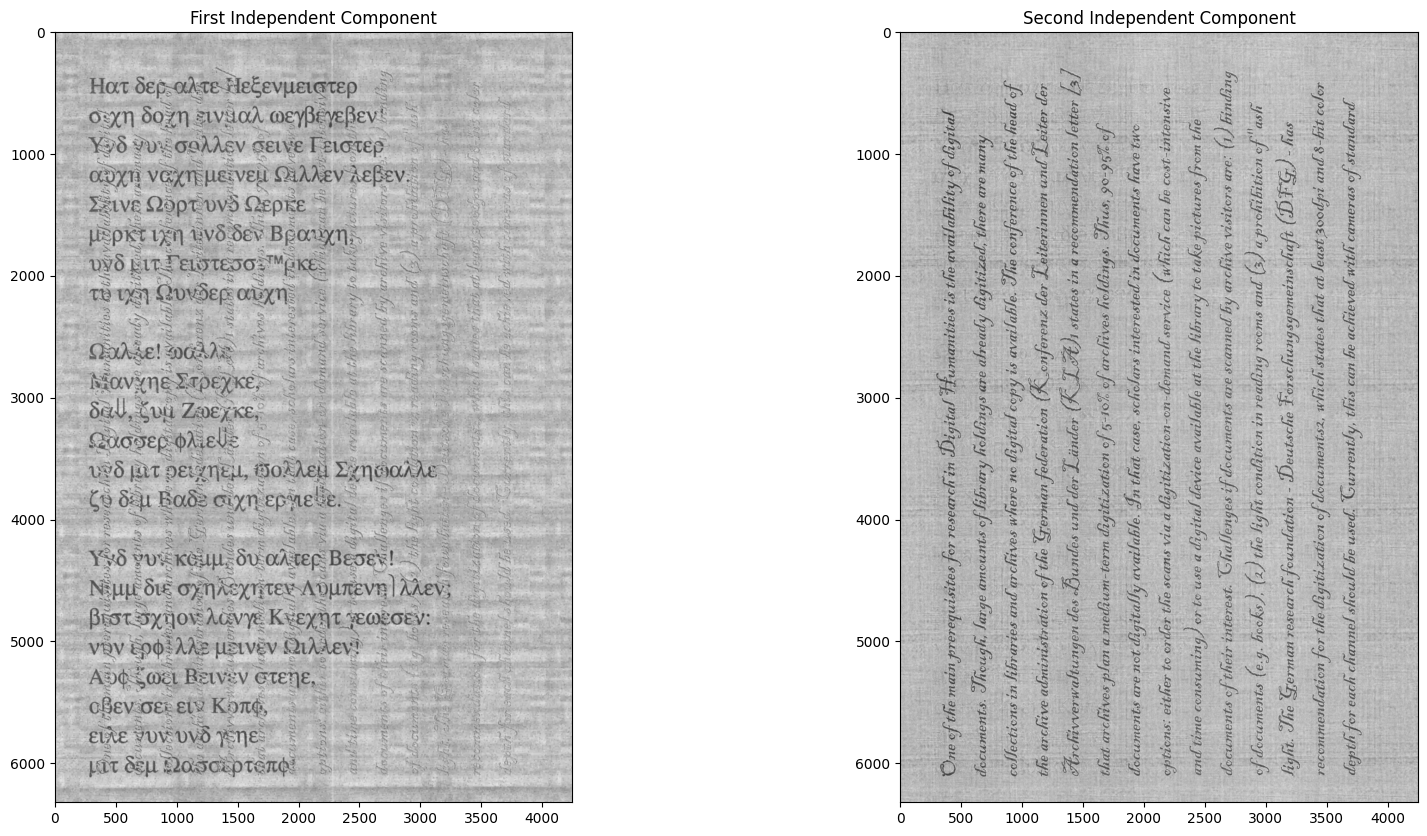

In [28]:
# Display results
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(component1, cmap='gray')
plt.title('First Independent Component')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(component2, cmap='gray')
plt.title('Second Independent Component')
plt.axis('off')

plt.show()

In [29]:
def ica_components(image):
    # Split image into red, green, and blue channels
    red_channel = image[:,:,2]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,0]

    # Reshape channels into vectors
    red_vector = red_channel.reshape(-1, 1)
    green_vector = green_channel.reshape(-1, 1)
    blue_vector = blue_channel.reshape(-1, 1)

    # Concatenate red, green, and blue vectors
    data = np.concatenate((red_vector, green_vector, blue_vector), axis=1)

    # Perform ICA
    ica = FastICA(n_components=3)
    components = ica.fit_transform(data)

    # Normalize values to range [0, 255]
    components_normalized = (components - np.min(components)) / (np.max(components) - np.min(components)) * 255

    # Reshape to image dimensions
    component1_image = components_normalized[:, 0].reshape(red_channel.shape)
    component2_image = components_normalized[:, 1].reshape(green_channel.shape)
    component3_image = components_normalized[:, 2].reshape(blue_channel.shape)

    # Map ends of axis to "black" and "white"
    component1_image[component1_image < 0] = 0
    component1_image[component1_image > 255] = 255
    component2_image[component2_image < 0] = 0
    component2_image[component2_image > 255] = 255
    component3_image[component3_image < 0] = 0
    component3_image[component3_image > 255] = 255

    # Generate new images as weighted sum of constituent images
    component1_combined = cv2.merge([component1_image, component1_image, component1_image])
    component2_combined = cv2.merge([component2_image, component2_image, component2_image])
    component3_combined = cv2.merge([component3_image, component3_image, component3_image])

    return component1_combined.astype(np.uint8), component2_combined.astype(np.uint8), component3_combined.astype(np.uint8)

# Call function to get ICA components
component1, component2, component3 = ica_components(image)

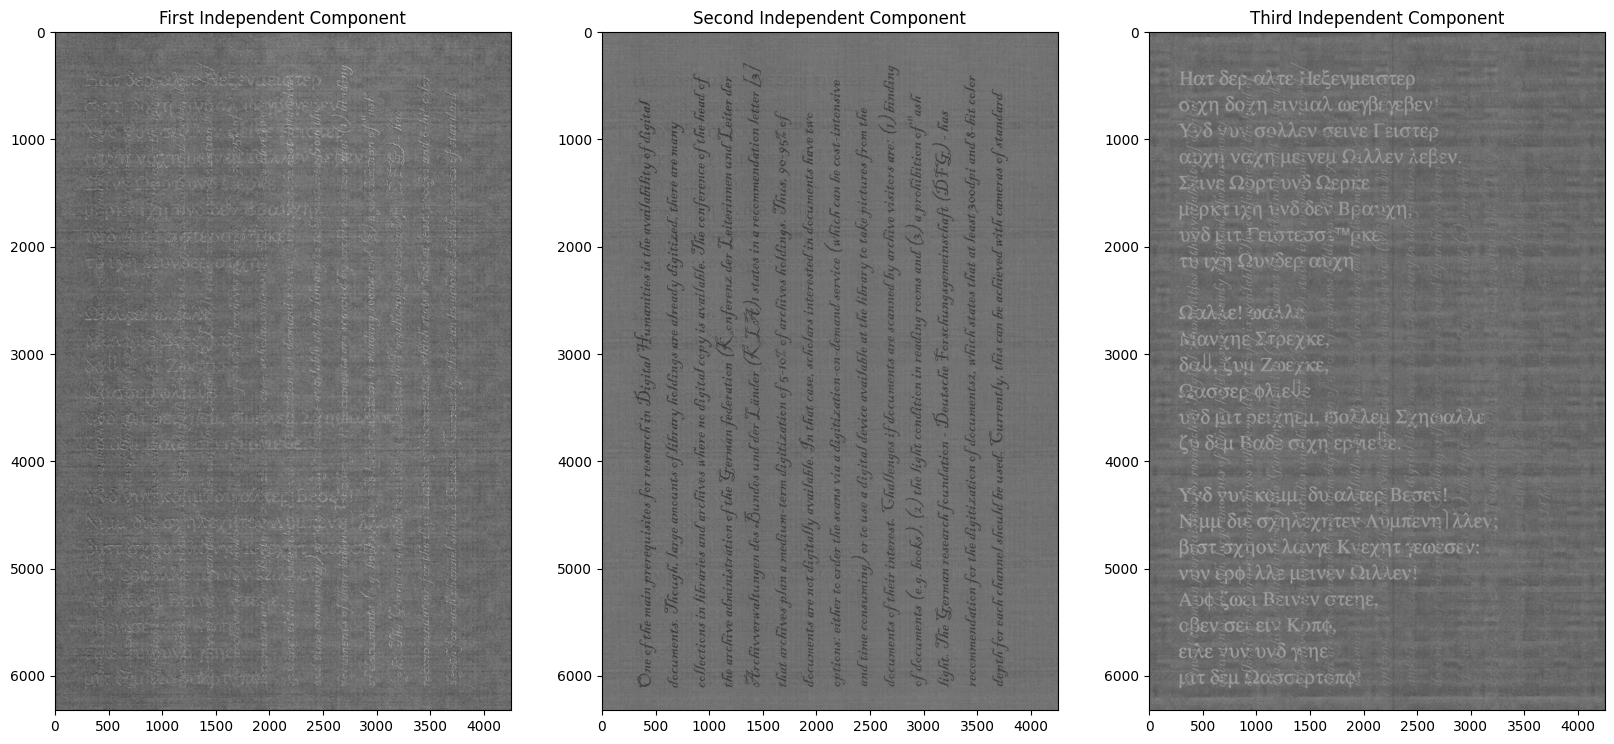

In [30]:
# Display results
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(component1)
plt.title('First Independent Component')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(component2)
plt.title('Second Independent Component')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(component3)
plt.title('Third Independent Component')
plt.axis('off')

plt.show()